# Computing the Holland Parameters

In [2]:
%matplotlib notebook

First we define some parameters

In [3]:
import numpy as np
# -------------------------------------------------------------------------
# Const
# -------------------------------------------------------------------------
nm2m=1852. # 1 nautical mile to meters
kt2ms=nm2m/3600.  # knots to m/s
omega=2*np.pi/(3600.*24.) # angular speed omega=2pi*f(=frequency of earth : 1 cycle per day) 2pi* 1 / day in seconds
rhoa=1.15 #air density  Kg/m^3
radius=6378388 #137. # earth's radius according to WGS 84
deg2m=np.pi*radius/180.  # ds on cicle equals ds=r*dth - dth=pi/180
pn=101000.  # Atmospheric pressure [N/m^2] (101KPa - enviromental pressure)

tetaNE=45. #mean angle [degrees] of North Eastern quadrant
tetaNW=135. #        "              North Western
tetaSW=225. #        "              South West
tetaSE=315. #        "              South East

maxR=500.e3  # maximum radius of TC [m] (500Km)

In [4]:
import matplotlib.pyplot as plt

In [21]:
import pandas as pd

### Holland Equation

In [5]:
def hvel(r):
    x=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    return (bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**x

In [6]:
bh=.81
vmaxh=41.15
kh=.04
rmaxh=21090.
dph=4350.
pch=pn-dph

In [7]:
rh=np.linspace(0.,5*rmaxh,100)

In [8]:
u=hvel(rh)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


<IPython.core.display.Javascript object>


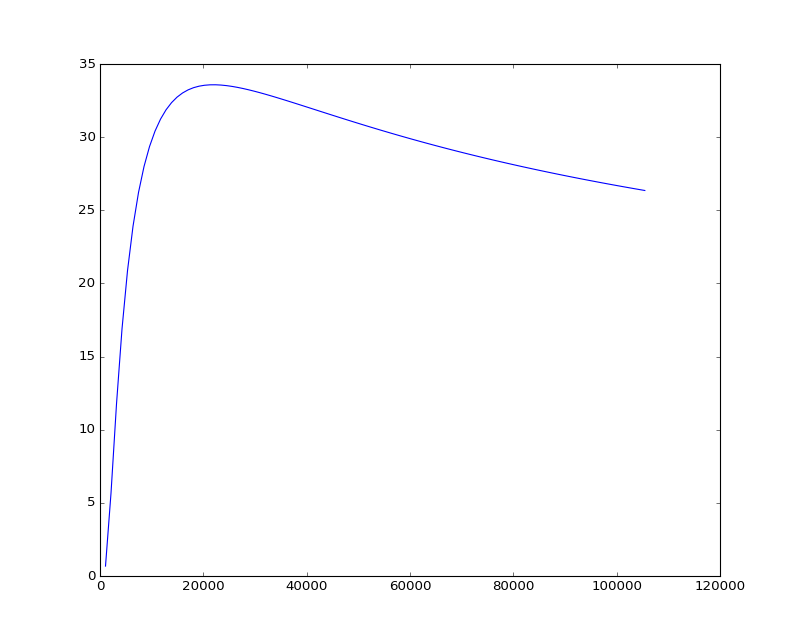

In [9]:
plt.figure(figsize=(10,8))
plt.plot(rh,u)
plt.show()

In [10]:
def pres(r):
    return pch+dph*np.exp(-(rmaxh/r)**bh)

In [11]:
pp=pres(rh)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


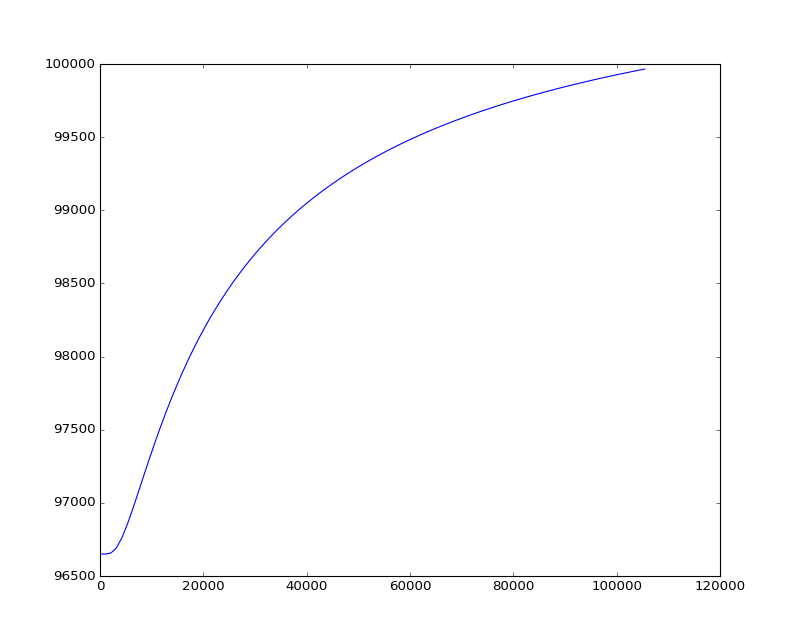

In [12]:
plt.figure(figsize=(10,8))
plt.plot(rh,pp)
plt.show()

In [13]:
xl=np.linspace(-maxR, maxR,1000)
yl=np.linspace(-maxR, maxR,1000)
q1,q2=np.meshgrid(xl,yl)
vtx=-4.6
vty=3.35

In [14]:
def hvel2d(l1,l2):
    r=np.sqrt(l1**2+l2**2)
    xh=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    ur=(bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**xh
    theta=np.arctan2(l2,l1)
    ux=-ur*np.sin(theta)
    uy=ur*np.cos(theta)
    return ux+vtx,uy+vty, pres(r)

In [15]:
zx,zy, pr=hvel2d(q1,q2)
vel=np.sqrt(zx**2+zy**2)

<IPython.core.display.Javascript object>


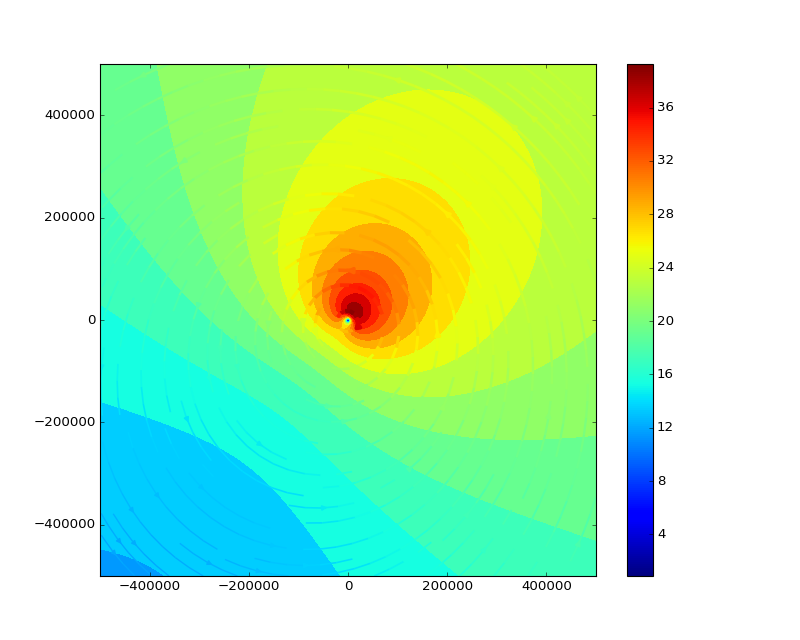

In [16]:
plt.figure(figsize=(10,8))
plt.contourf(q1,q2,vel,20)
plt.streamplot(q1,q2,zx,zy, color=vel, linewidth=0.1*vel)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


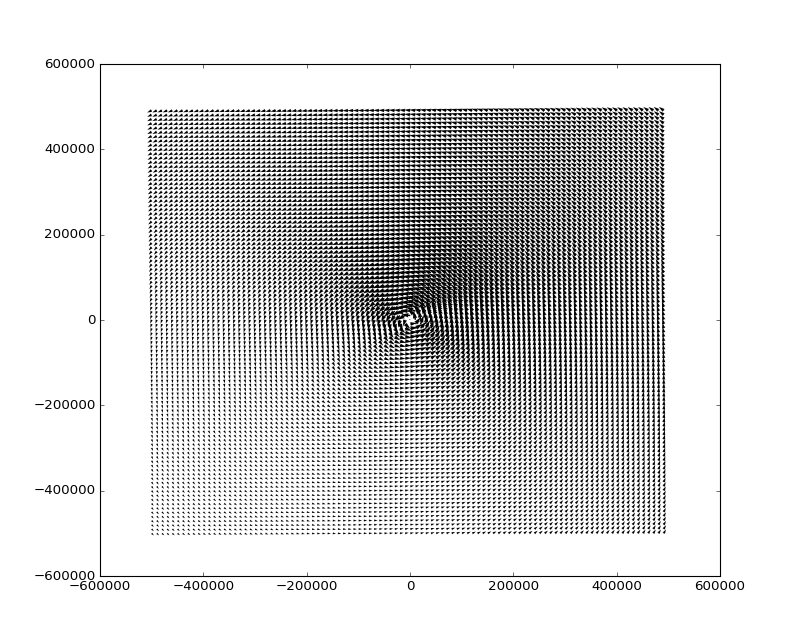

In [17]:
plt.figure(figsize=(10,8))
plt.quiver(q1[::10,::10],q2[::10,::10],zx[::10,::10],zy[::10,::10], units='x', angles='xy',scale=1./500)
plt.show()

## Holland Parameter Evaluation

The input data comes from the bulletins and are given in txt and xml format for the workflow to begin. These file are stored in a folder with the path name defined as '/mnt/web2/cycloneSurgeVM/' + TC_number/Bulletin_number/. 

As an example we can read the latest input files created ...

In [18]:
#import os
#def all_subdirs_of(b='.'):
#  result = []
#  for d in os.listdir(b):
#    bd = os.path.join(b, d)
#    if os.path.isdir(bd): result.append(bd)
#  return result

In [24]:
path='tmp/'

In [22]:
#dirs=all_subdirs_of(path)

In [20]:
#latest_subdir = max(dirs, key=os.path.getmtime)

In [21]:
#latest_subdir

'/mnt/web/cycloneSurgeVM/1000330_JTWC'

In [22]:
# or define dir 
latest_subdir = path#+'1000316_NOAA/'

Define bulletin

In [23]:
bul=13

In [24]:
infolder=latest_subdir+'/input/{}'.format(bul)

In [25]:
os.listdir(infolder)

['bulInfo.txt',
 'bulInfo.xml',
 'info.pr',
 'info.xml',
 'inpData.txt',
 'inpData.xml',
 'past_info.pr',
 'past_info.xml',
 'past_inpData.txt',
 'past_inpData.xml']

The main files with info are bulInfo, info, inpData. We can parse those files to get 

In [26]:
#import xml.etree.ElementTree as et
import lxml.etree as et


In [27]:
tree=et.parse(infolder+'/info.xml')
root=tree.getroot()
print et.tostring(root,pretty_print=True)

<setexp>
<source> Tropical Cyclone Bulletin through GDACS/PDC</source>
<hurName>MATTHEW-16</hurName>
<hurId>1000316</hurId>
<basin>Atlantic</basin>
<bulNo>13</bulNo>
<bulDate>01 Oct 2016  09:00:00</bulDate>
<n>100000</n>
<fk>0.81</fk>
<stormsurge>0</stormsurge>
<timefactor>1</timefactor>
<landfall>1</landfall>
</setexp>



In [28]:
tree=et.parse(infolder+'/bulInfo.xml')
root=tree.getroot()
#print et.tostring(root,pretty_print=True)

In [29]:
tree=et.parse(infolder+'/inpData.xml')
root=tree.getroot()
#print et.tostring(root,pretty_print=True)

The above information is used as input for the evaluation of the Holland parameters.

Next the range of Holland parameters is defined (see 'Global storm surge forecast and inundation modeling' report by Probst & Franchello)

In [30]:
npmin=2 # ??????

kmin=0  # low limit of parameter k (=xn-.5-> k=0-> x=0.5)
kmax=0.15 # upper limit for k (->xn=.65)  WHY?

dpmin=10.e2  # minimum value of  pressure drop P_central - P_env(=101kPa).
dpmax=200.e2   # maximum value of  pressure drop P_central - P_env(=101kPa).
rvmaxmin=10.e3  # default minimum value of Rmax[m] 

bmin=0.8 # minimum value of holland parameter b
#bmax=2.5
bmax=1.8  # maximum value of holland parameter b
b0=1.2  # initial estimation of holland parameter b

rmax0=20.e3  # intial estimation for radius of maximum wind [m] (20km)
maxR=500.e3  # maximum radius of TC [m] (500Km)



In [31]:
infofile=infolder+'/info.xml'
from xmldic import bxml
info=bxml(infofile)


In [32]:
info

Bunch(setexp=Bunch(basin=u'Atlantic', bulDate=u'01 Oct 2016  09:00:00', bulNo=u'13', fk=u'0.81', hurId=u'1000316', hurName=u'MATTHEW-16', landfall=u'1', n=u'100000', source=u'Tropical Cyclone Bulletin through GDACS/PDC', stormsurge=u'0', timefactor=u'1'))

Reading the inpData into a dictionary 

In [33]:
from xmlreader import xmlr
inpfile=infolder+'/inpData.xml'

In [34]:
inpdat=xmlr(inpfile)
time=inpdat.time ; print 'TIME=',time # time frame of forecasting (from bulletin)
lat=inpdat.lat ; print 'LAT=',lat # TC position 
lon=inpdat.lon ; print 'LON=',lon  #  ''
vmax=inpdat.vmax ; print 'VMAX=',vmax  # forecasted manimum velocity (from bulletin)
ne64=inpdat.ne64 ; print 'NE64=',ne64  # distance in nautical miles that the velocity is 64 knt at the north-estern quadrant  
se64=inpdat.se64 ; print 'SE64=',se64  #                         "                                     south-estern
sw64=inpdat.sw64 ; print 'SW64=',sw64
nw64=inpdat.nw64 ; print 'NW64=',nw64
ne50=inpdat.ne50 ; print 'NE50=',ne50   # distance in nautical miles that the velocity is 50 knt at the north-estern quadrant
se50=inpdat.se50 ; print 'SE50=',se50
sw50=inpdat.sw50 ; print 'SW50=',sw50
nw50=inpdat.nw50 ; print 'NW50=',nw50
ne34=inpdat.ne34 ; print 'NE34=',ne34    # distance in nautical miles that the velocity is 34 knt at the north-estern quadrant
se34=inpdat.se34 ; print 'SE34=',se34
sw34=inpdat.sw34 ; print 'SW34=',sw34
nw34=inpdat.nw34 ; print 'NW34=',nw34


TIME= [   0.    9.   21.   33.   45.   69.   93.  117.]
LAT= [ 13.3  13.3  13.8  14.9  16.2  19.5  23.   26. ]
LON= [-72.8 -73.6 -74.5 -75.1 -75.7 -76.  -76.  -76.5]
VMAX= [ 69.444  66.872  61.728  56.584  56.584  56.584  46.296  48.868]
NE64= [ 30.  30.  40.  40.   0.   0.   0.   0.]
SE64= [ 20.  20.  30.  30.   0.   0.   0.   0.]
SW64= [ 20.  20.  20.  20.   0.   0.   0.   0.]
NW64= [ 40.  30.  30.  30.   0.   0.   0.   0.]
NE50= [  80.   90.   80.   80.   80.  100.    0.    0.]
SE50= [ 30.  40.  40.  50.  50.  70.   0.   0.]
SW50= [ 30.  30.  30.  40.  40.  50.   0.   0.]
NW50= [ 70.  70.  70.  60.  60.  60.   0.   0.]
NE34= [ 180.  160.  150.  150.  170.  180.    0.    0.]
SE34= [  60.   80.   90.  100.  120.  160.    0.    0.]
SW34= [  50.   50.   60.   70.   70.  100.    0.    0.]
NW34= [ 170.  150.  140.  130.  140.  140.    0.    0.]


Define variables

In [35]:
bulNo=np.int(info.setexp.bulNo); print bulNo

nb=10000  #size of random numbers used

fk=0.92  # coefficient for going from 1m to 10m in velocities ????????????????????????

fvtr=1.0

stitle=info.setexp.source ; print stitle

hurName=info.setexp.hurName; print hurName

bulDate=info.setexp.bulDate; print bulDate



13
Tropical Cyclone Bulletin through GDACS/PDC
MATTHEW-16
01 Oct 2016  09:00:00


In [36]:
sig=np.sign(lon) ; print sig # get the sign of longitute 
sig1=sig[0] ; print sig1 # uses the first sign to set the adjustment below. 

m=sig != sig1  ; print m # map the values of lon that have sign different from the first lon

print sum(m)

[-1. -1. -1. -1. -1. -1. -1. -1.]
-1.0
[False False False False False False False False]
0


In [37]:
if sum(m)>0:
# adjust the lon values going from -180:180
        if sig1 > 0:
                lon[m]=lon[m]+360.
        elif sig1 < 0:
                lon[m]=lon[m]-360.



In [38]:
lon

array([-72.8, -73.6, -74.5, -75.1, -75.7, -76. , -76. , -76.5])

In [39]:
# storing the input quantities

TIME =  time
LAT = lat
LON = lon
VMAX0 = vmax

ntime=np.size(TIME) # number of time steps from bulletin


# initialize arrays
deltaptot = np.zeros(ntime)
btot = np.zeros(ntime)
ktot=np.zeros(ntime)
rmaxtot = np.zeros(ntime)
vmax0tot = np.zeros(ntime)
vmax0ktot = np.zeros(ntime)
vmax1tot = np.zeros(ntime)
vtrtot = np.zeros(ntime)
vtrxtot = np.zeros(ntime)
vtrytot = np.zeros(ntime)
rmsetot=np.zeros(ntime)
biastot=np.zeros(ntime)



## Calculate translation velocity

In [40]:
#calcf='/mnt/calcf/storage/tmp/'+info.setexp.hurId
#calcf='/mnt/hyfluxVM/storage/tmp/'+info.setexp.hurId+'_JTCW' # in case the operational has no available data

In [41]:
%%skip
with open (calcf+'/longSign.pr', 'r') as myfile:
        data=myfile.read()
sig1=np.int(data[5::]) ; print sig1


In [42]:
sig=np.sign(lon)
sig1=sig[0]

m=sig != sig1 ; print m
if np.sum(m) != 0 :
    if (sig1 > 0): lon[m] = lon[m]+360
    if (sig1 < 0): lon[m] = lon[m]-360

print sig1

[False False False False False False False False]
-1.0


In [43]:
# tsec=np.array(time)*3600  #translate time from hours to sec
tsec=time*3600  #translate time from hours to sec
nv=np.size(tsec) # create an array of equal size


In [44]:
t1000=np.linspace(tsec[0],tsec[-1],1000)  # create an array of equally spaced points that spans the time with 1000 points

In [45]:
x=lon
y=lat


In [46]:
from scipy.interpolate import interp1d, splrep, splev
#------------------------------------------------------------------------------------------------------
# linear (if we have less or equal that 2 points, or spline interpolation on the array created above
#------------------------------------------------------------------------------------------------------

if (nv < 2):
        fx=interp1d(tsec,x)
        fy=interp1d(tsec,y)
        x1000 = fx(t1000)
        y1000 = fy(t1000)
elif nv==3 :
        fx=interp1d(tsec,x,kind='quadratic')
        fy=interp1d(tsec,y,kind='quadratic')
        x1000 = fx(t1000)
        y1000 = fy(t1000)
else:
        tck=splrep(tsec,x,s=0)
        x1000 = splev(t1000,tck,der=0)
        tck=splrep(tsec,y,s=0)
        y1000 = splev(t1000,tck,der=0)



<IPython.core.display.Javascript object>


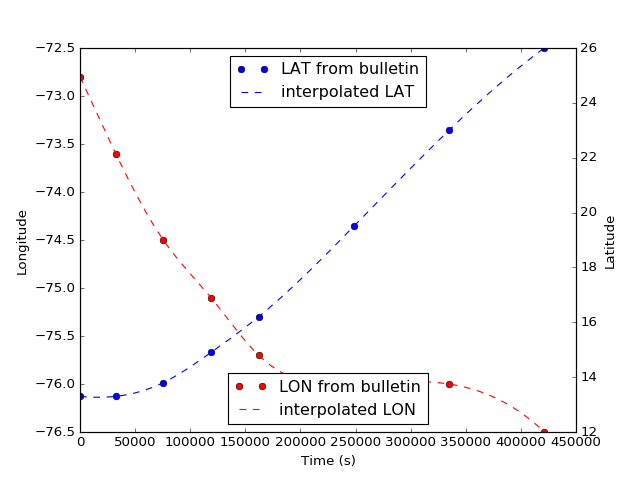

In [47]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(tsec,x,'ro',label='LON from bulletin')
ax.plot(t1000,x1000,'r--',label='interpolated LON')

ax.set_ylabel('Longitude')
ax2 = ax.twinx()
ax2.plot(tsec,y,'bo', label='LAT from bulletin')
ax2.plot(t1000,y1000,'b--', label='interpolated LAT' )

ax2.set_ylabel('Latitude')
ax.set_xlabel('Time (s)')
ax.legend(loc=8)
ax2.legend(loc=9)
plt.show()

In [48]:
%%skip
p1 = figure(title="Holland", y_range=(x.min()-1, x.max()+1), min_border=80, tools=TOOLS)

p1.circle(tsec, x, fill_color="red", size=5, line_color="black", legend="LON from bulletin")
p1.line(t1000, x1000, legend="interpolated LON")
p1.xaxis.axis_label = "Time (s)"
p1.yaxis.axis_label = "Longitude"

p1.extra_y_ranges['Latitude'] = Range1d(y.min()-1, y.max()+1)
p1.circle(tsec, y, fill_color="blue", size=5, line_color="black", y_range_name="Latitude",legend='LAT from bulletin')
p1.line(t1000, y1000, y_range_name="Latitude", line_color="blue", line_style='dashed', legend="interpolated LAT")

p1.add_layout(LinearAxis(y_range_name="Latitude"), 'right')

p1.legend.location = "top_left"
p1.xaxis.formatter=NumeralTickFormatter(format="00")
show(p1)

In [49]:
# compute the arc length s for all the points (time), that is the trajectory in time

s1000 = np.cumsum(np.sqrt(np.ediff1d(x1000)**2+np.ediff1d(y1000)**2))
s1000 = np.insert(s1000,0,0)  # adding 0 for the first point



<IPython.core.display.Javascript object>


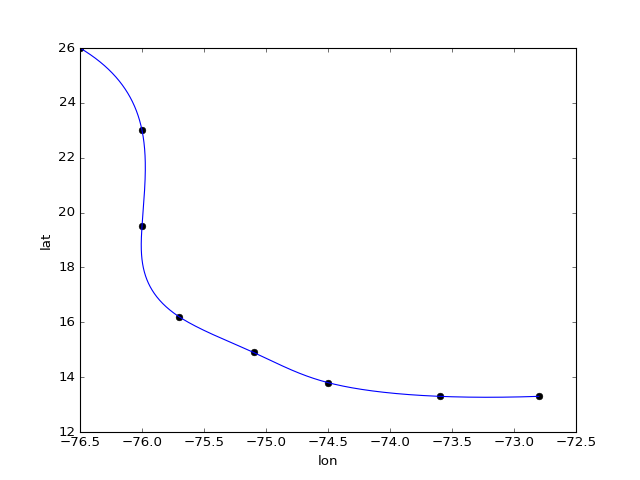

In [50]:
# plot the initial points and the interpolated tranjectory

plt.figure()
plt.plot(x,y,'ko',x1000,y1000,'-')
plt.xlabel('lon')
plt.ylabel('lat')
#plt.savefig(outdirplot+'/track.png')
plt.show()

In [51]:
def family(x, *args):

        farg=[]
        for arg in args:
                farg.append(interp1d(x,arg,kind='quadratic'))
        
        return farg


In [52]:
dt=tsec[1]-tsec[0]  # time increment, depends on the number of points, default 12 hours
t1=np.maximum(tsec-dt,tsec[0]) # extrapolate backwards (or zero for bulNo 1) for a dt
t2=np.minimum(tsec+dt,tsec[-1]) #extrapolate forward for dt

print tsec
print t1
print t2


[      0.   32400.   75600.  118800.  162000.  248400.  334800.  421200.]
[      0.       0.   43200.   86400.  129600.  216000.  302400.  388800.]
[  32400.   64800.  108000.  151200.  194400.  280800.  367200.  421200.]


In [53]:
#define  a linear interpolation function s(t) 
[fs]=family(t1000,s1000)
s1=fs(t1)  # compute values for points t1 
s2=fs(t2)  # compute values for points t2

#define  a linear interpolation function x(t) 
[fx]=family(t1000,x1000)
x1=fx(t1)
x2=fx(t2)


#define  a linear interpolation function y(t) 
[fy]=family(t1000,y1000)
y1=fy(t1)
y2=fy(t2)

t1h=t1/3600 #translate to hours
t2h=t2/3600

print t1h
print t2h

[   0.    0.   12.   24.   36.   60.   84.  108.]
[   9.   18.   30.   42.   54.   78.  102.  117.]


In [54]:
cincl=(x2-x1)/(s2-s1) # compute cos(phi)=dx/ds on the tranjectory
sincl=(y2-y1)/(s2-s1) # compute sin(phi)=dy/ds on the tranjectory
vt=(s2-s1)/(t2-t1)  # compute translational velocity ds/dt

cincl_=np.cos(np.arctan2(y,x))
sincl_=np.sin(np.arctan2(y,x))

vtrx0 = vt * cincl * deg2m
vtrx = vtrx0 *np.cos(np.radians(lat)) #compute translational vx=vt*cos(phi) adjusted for latitude
vtry = vt * sincl * deg2m

#vtrx_ = vt * cincl_
#vtry_ = vt * sincl_

vtr = np.sqrt(vtrx**2+vtry**2)

print vtrx,vtry,vtr

[-2.67501335 -2.5196144  -1.84017436 -1.49542564 -1.12843692  0.02893874
 -0.1957425  -0.87626441] [ -2.01852665e-08   5.36108854e-01   2.11116005e+00   3.13144152e+00
   3.67063508e+00   4.55180689e+00   4.29580062e+00   3.53613234e+00] [ 2.67501335  2.57601813  2.80057823  3.47019075  3.84017341  4.55189888
  4.30025791  3.6430854 ]


<IPython.core.display.Javascript object>


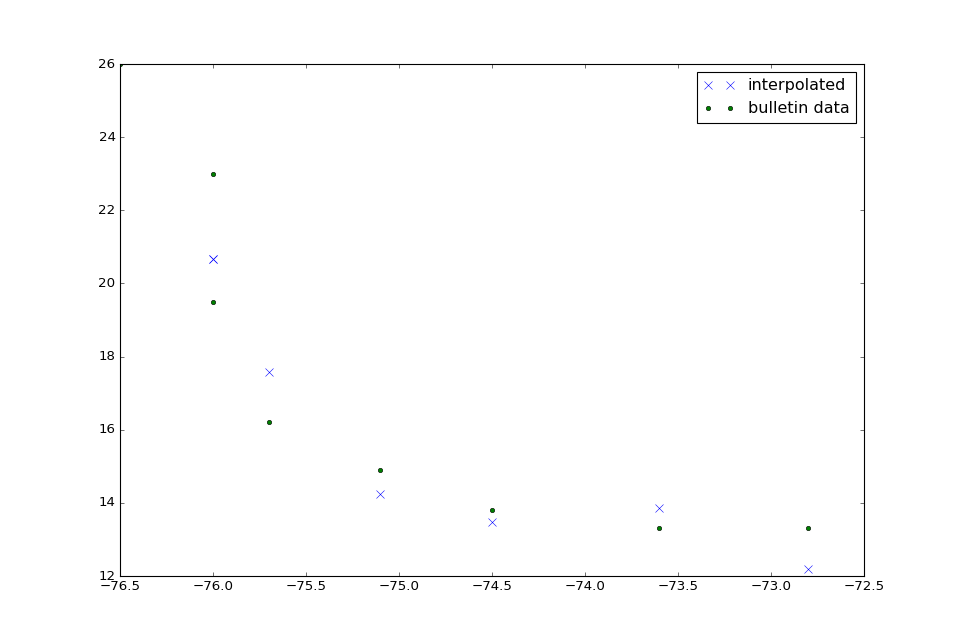

In [55]:
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(x1000, y1000)
#spl.derivatives(x)
spl.set_smoothing_factor(0.)
plt.figure(figsize=(12,8))
plt.plot(x,spl(x),'x',markersize=8,label='interpolated')
plt.plot(x,y,'o',markersize=4,label='bulletin data')
plt.legend()
plt.show()

In [56]:
if ntime > 1:   # if we have a bulletin with time array ...
# multiply with the coefficient for 1m to 10m transformation CHECK ? 
        vtr=vtr*fvtr
        vtrx=vtrx*fvtr
        vtry=vtry*fvtr
# store variables
        SINFI = sincl
        COSFI = cincl
        VTR = vtr
        VTRX = vtrx
        VTRY = vtry

else:
     try:
# extrapolate from previous bulletin
        dpath=calcf+'/{}/vtcalc.txt'.format(bulNo-1)
        time1,sincl,cincl,vtr,vtrx,vtry = np.load.txt(dpath).T
        [sincl,cincl, vtr, vtrx, vtry] =family(time1,sincl,cincl,vtr,vtrx,vtry)
        

        SINFI = sincl(time+6)
        COSFI = cincl(time+6)
        VTR = vtr(time+6)
        VTRX = vtrx(time+6)
        VTRY = vtry(time+6)
     
     except:
        
        # set default values
        SINFI = 1
        COSFI = 0
        VTR = 0
        VTRX = 0
        VTRY = 0

In [57]:
#==========================================================================
# loop over all times in bulletin - BELLOW the workflow for one time
#==========================================================================
done=0
t=0

time = TIME[t]
lat = LAT[t]
lon = LON[t]
vmax0 = VMAX0[t]
vmax0k = vmax0*fk
V0=np.array([64, 64, 64, 64, 50, 50, 50, 50, 34, 34, 34, 34])*kt2ms*fk #translate knots to m/s
R0=np.array([ne64[t], se64[t], sw64[t], nw64[t], ne50[t], se50[t], sw50[t], nw50[t], ne34[t], se34[t], sw34[t], nw34[t]])*nm2m #translate from nautical miles to m
an=np.array([tetaNE, tetaSE, tetaSW, tetaNW,tetaNE, tetaSE, tetaSW, tetaNW,tetaNE, tetaSE, tetaSW, tetaNW])
vtr = VTR[t]
vtrx = VTRX[t]
vtry = VTRY[t]
sinfi = SINFI[t]
cosfi = COSFI[t]


In [58]:
M=(R0 != 0) & (R0 < maxR)  # find which radii are not zero and less than  Rmax(=500km)
if  np.sum(M) < npmin : # if there are less than 2
        if (done) :  # if not the time[0] use the previous values
                rmax = rmaxtot[t-1]
                b = btot[t-1]
                k = ktot[t-1]

        else:
                rmax = rmax0
                b = b0
                k = kmin

        bias=None
        rmse=None

        dp = vmax0**2*rhoa*np.exp(1)/b
        deltaptot[t] = dp
        btot[t] = b
        rmaxtot[t] = rmax
        vmax0tot[t] = vmax0
        vmax0ktot[t] = vmax0k
        vmax1tot[t] = np.max([vmax0k-vtr, vmax0k/2])
        vtrtot[t] = vtr
        vtrxtot[t] = vtrx
        vtrytot[t] = vtry
        ktot[t] =k
        biastot[t]=bias
        rmsetot[t] = rmse
      #  continue

V0 = V0[M]
R = R0[M]
an = an[M]
sinan = np.sin(np.radians(an+90))  # an +90 = angle of tangential wind
cosan=np.cos(np.radians(an+90))

npv=np.size(V0)


In [59]:
#--------------------------------------------------
# calculate V wind radii (V - translational velocity)
#--------------------------------------------------
RATIO = (rmax0/R)**b0    # assume exponential decay eqs (13) from JRC report
EXPRATIO = np.exp(-RATIO)  #                       "

VT=vtr*(cosfi * cosan + sinfi * sinan)*(1-EXPRATIO)   # Eq (15) from JRC report
#   VT=vtr*(cosfi * cosan + sinfi * sinan)*(RATIO)

if (lat<0): VT=-VT   # reverse for south hemishpere
VV = V0-VT   # substract translational velocity from TC velocity

# calculate  f WR

deltalatWR=R/deg2m*np.sin(np.radians(an))
latWR=lat+deltalatWR

fWR=2*omega*np.abs(np.sin(np.radians(latWR))) # Coriolis parameter f=2*Omega*sin(lat)
Vnco=((VV+R*fWR/2)**2-(R*fWR/2)**2)**0.5
V=Vnco


In [60]:
#--------------------------------------------------
# Choose valid velocities
#--------------------------------------------------
M=V>0

if np.sum(M) == 0 : print 'continue'

V0 = V0[M]
VV = VV[M]
V=V[M]
R=R[M]


In [61]:
#--------------------------------------------------
#  calculate  vmax = vmax0 - vt
#--------------------------------------------------
vmax0vt=np.max([vmax0k-vtr,np.max(V)])


#--------------------------------------------------
#  calculate coriolis for vmax
#--------------------------------------------------
if (lat>0):
      #sinfivmax=np.sin(fi-90)=-np.cos(fi)
      sinfivmax=-cosfi
else:
      #sinfivmax=np.sin(fi+90)=np.cos(fi)
      sinfivmax=cosfi



Now we estimating the Rmax. A number of ways apply. Next we explore our options

## Calculating using Monte Carlo (operational)

In [62]:
if (npv>npmin):
     K=kmin+(kmax-kmin)*np.random.rand(nb)
elif(done):
     K = np.ones(nb)*ktot[t-1]
else:
     K = np.ones(nb)*kmin

#  DP
DP=dpmin*(dpmax/dpmin)**np.random.rand(nb)

#  Rmax
rvmaxmin=np.min([rvmaxmin,np.min(R)*0.5])  # update the minimum  value for Rmax with the R.min/2 from input
RMAX=rvmaxmin*(np.min(R)*0.99/rvmaxmin)**np.random.rand(nb) # range  min(10000,Rmin/2)<Rmax<.99*Rmin (scaled)

#--------------------------------------------------
# calculate vmax1 = v max0k -vt - Coriolis effect (function of RMAX)
#--------------------------------------------------
deltalatvmax=RMAX/deg2m*sinfivmax  # for each Rmax we compute the lat deviation for the velocity
latvmax=lat+deltalatvmax

fvmax=2*omega*np.abs(np.sin(np.radians(latvmax))) # Coriolis coef f

fvmax2=RMAX*fvmax/2
vmax1=((vmax0vt+fvmax2)**2-fvmax2**2)**0.5
mask=vmax1<np.max(V)
np.copyto(vmax1,np.max(V),where=mask)

#----------------------------------
# use the random values of vmax,dp above we compute b (from Holland 2010 - eqs (7))

B=(rhoa*np.exp(1)/DP)*vmax1**2


m=(B >= bmin) & ( B <= bmax) & (lat*latvmax > 0)  # mask B that fits all 3 criteria
nb1 = np.sum(m) #number of 'True' values

#  mask arrays accordingly
K=K[m]
DP=DP[m]
RMAX=RMAX[m]
B = B[m]

nval = np.size(V)  # number of V > 0
Vcalc = []
RMS = np.zeros(nb1)

try:
        r
except NameError:
        pass
else:
        r=None

# check values for all V
for i in range(nval):
      try:
        r = R[i]
        ratio=(r-RMAX)/(maxR-RMAX)
        X=0.5 + np.min([np.max(ratio,0),1])*K   #compute x using random k  & Rmax
        Vcalc=np.append(Vcalc,((B/rhoa) * DP* (RMAX/r)**B * np.exp(-(RMAX/r)**B))**X)  # compute & store V
      except: print 'sys.exit()'

for i in range (nb1):
      try:
        RMS[i]=np.sqrt(np.average((Vcalc[i::nb1]-V)**2))  # compute deviation from estimated and given values
      except : print 'sys.exit()'

value=nb1
totvalue=nb

# -------------------------------------------------------------------------
# select final velocities
# -------------------------------------------------------------------------
m=RMS == np.min(RMS)  #find minimum RMS

# select the minimizing quantities
rmse=RMS[m][0]
dp=DP[m][0]
b=B[m][0]
rmax=RMAX[m][0]
k=K[m][0]

vmax1 = np.sqrt(b*dp/(rhoa*np.exp(1)))  # compute estimated vmax


# print on screen
var=[t,time,rmse,dp,b,rmax,k ,vmax0,vmax0k,vmax0vt,np.max(VV),np.max(V),vmax1]
varn=['t','time','rmse','dp','b','rmax','k' ,'vmax0','vmax0k','vmax0vt','np.max(VV)','np.max(V)','vmax1']
#  for i in range(np.size(var)):
#          print repr(varn[i]).rjust(25), repr(var[i])



In [63]:
## helper function for plotting below
def expf(t,A,K,C):
        return A*np.exp(K*t)+C



<IPython.core.display.Javascript object>


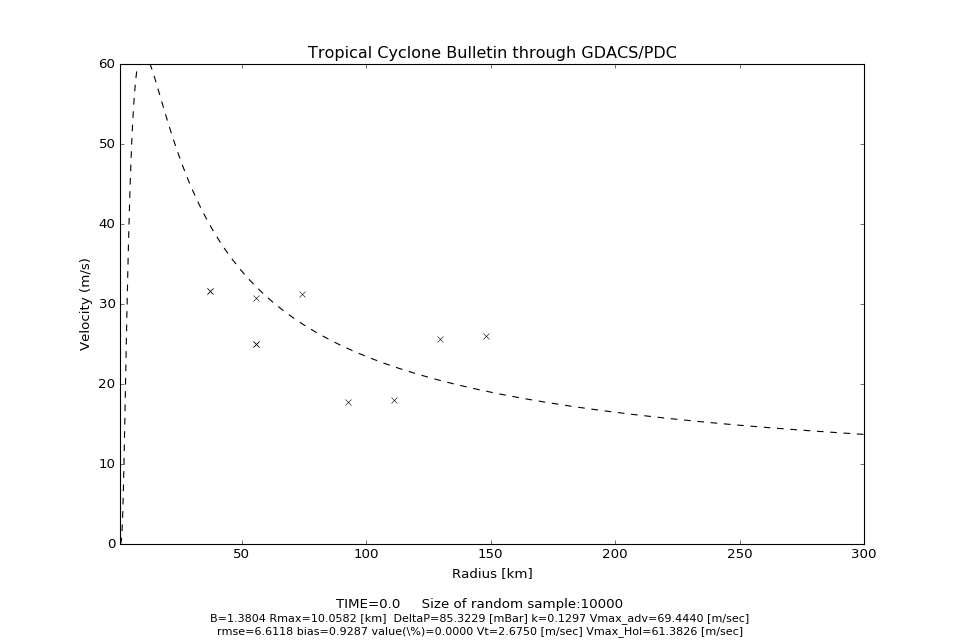

In [64]:
#******************************************************************************
# PLOT Vg
#******************************************************************************
Rmax=rmax

rx=np.arange(100)
ex=np.log(max(R)*1.2/1000.)/100.
r=expf(rx,1000.,ex,0.)

ratio=(r-rmax)/(maxR-rmax)

mask=ratio<0.
np.copyto(ratio,0.,where=mask)
mask=ratio>1.
np.copyto(ratio,1.,where=mask)

xh=0.5 + ratio*k

Vg=( (b/rhoa) * dp* (Rmax/r)**b * np.exp(-(Rmax/r)**b) )**xh

[fVg]=family(r,Vg)

bias=np.average(fVg(R)-V)
rmse=np.sqrt(np.average((fVg(R)-V)**2))


plt.figure(figsize=(12,8))
plt.plot(R/1000,V,'kx',r/1000,Vg,'k--')
plt.axis([r.min()/1000,300.,0.,60.])
plt.xlabel('Radius [km]')
plt.ylabel('Velocity (m/s)')
plt.title(stitle)
plt.figtext(.5,.05,'TIME='+np.str(time)+'     Size of random sample:'+np.str(nb),horizontalalignment='center')
plt.figtext(.5,.03,'B='+'%.4f' % b+' Rmax='+'%.4f' % (Rmax/1000)+' [km]  DeltaP='+'%.4f' % (dp/100)+' [mBar] k='+'%.4f' % k+' Vmax_adv='+'%.4f' % vmax0+' [m/sec]',horizontalalignment='center',size='small')
plt.figtext(.5,.01,'rmse='+'%.4f' % rmse+' bias='+'%.4f' % bias+' value(\%)='+'%.4f' %(value/totvalue*100)+' Vt='+'%.4f' % vtr+' [m/sec] Vmax_Hol='+'%.4f' % vmax1+' [m/sec]',horizontalalignment='center',size='small')
plt.subplots_adjust(bottom=.15)
plt.show()

## Calculating using Scipy 

In [65]:
# p[0] = B
# p[1] = Rmax
# p[2] = dP
# p[3] = k

from scipy.optimize import minimize, fmin_slsqp

def slsqp(R,V,maxR,rho,b,rmax,dp,k,vmax):
        dpmin=10.e2  # minimum value of  pressure drop P_central - P_env(=101kPa).
        dpmax=200.e2   # maximum value of  pressure drop P_central - P_env(=101kPa).
        kmin=0  # low limit of parameter k (=xn-.5-> k=0-> x=0.5)
        kmax=0.15 # upper limit for k (->xn=.65)  WHY?

        def func(p,x):
                 return (p[0]/rho*(p[1]/x)**p[0]*p[2]*np.exp(-(p[1]/x)**p[0]))**(0.5+(x-p[1])/(maxR-p[1])*p[3])
#                 return ((p[1]/x)**p[0]*vmax**2*np.exp(1.-(p[1]/x)**p[0]))**(0.5+(x-p[1])/(maxR-p[1])*p[2])
             #   return (p[0]/rho*(p[1]/x)**p[0]*dp*np.exp(-(p[1]/x)**p[0]))**(0.5+(x-p[1])/(maxR-p[1])*p[2])
        def errf(p,x,y):
            return np.sum((func(p,x)-y)**2)

#       def cf(p,x,y):
#           return vmax-func(p,p[1])
        def cf(p,x,y):
                 return p[0]-vmax**2*rho*np.exp(1.)/p[2]

        p0=[1.2,20000,400,.15]
#        p0=[1.2,20000,.5]


        bp=[(.8,2.5),(5000,R.min()*.99),(dpmin,dpmax),(0.,.15)]
#        bp=[(.8,1.8),(5000,R.min()*.99),(kmin,kmax)]

        res1 = minimize(errf, p0, args=(R, V), method='L-BFGS-B', bounds=bp, \
                        options={'disp': True, 'maxls': 20, 'iprint': -1, 'gtol': 1e-05, 'eps': 1e-08, 'maxiter': 15000, 'ftol': 2.220446049250313e-09, 'maxcor': 10, 'maxfun': 15000})
        print 'L-BFGS-B', res1.x
        res2 = minimize(errf, p0, args=(R, V), method='SLSQP', bounds=bp, tol=1e-3, options={'disp': True, 'iprint': 1, 'eps': 1.4901161193847656e-08, 'maxiter': 100, 'ftol': 1e-06})
        print 'SLSQP', res2.x, res2.fun, res2.message
        res = fmin_slsqp(errf, p0, bounds=bp, args=(R, V),f_ieqcons=cf,acc=1e-5)
        print res

        

        print 'Rmax= ', res1.x[1],res2.x[1]
        print 'F(Rmax)= ', cf(res1.x,0.,0.), cf(res2.x,0.,0.)
        return func,res1.x,res2.x, res



In [66]:
fitf2,p2,p3,p4=slsqp(R,V,maxR,rhoa,b0,rvmaxmin,dpmin,kmin,vmax0vt)

L-BFGS-B [  9.77012816e-01   2.00875714e+04   3.08883613e+03   1.50000000e-01]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 151.50659608
            Iterations: 52
            Function evaluations: 324
            Gradient evaluations: 52
SLSQP [  8.14729742e-01   5.00000000e+03   7.25136474e+03   1.50000000e-01] 151.50659608 Optimization terminated successfully.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 160.457600753
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
[  9.76175952e-01   2.00097730e+04   3.09623893e+03   1.50000000e-01]
Rmax=  20087.5714226 5000.00000005
F(Rmax)=  0.3938916054 -1.52796805111


In [67]:
print 'B: ', p2[0], p3[0], p4[0]
print 'Rmax: ', p2[1]/1000, p3[1]/1000, p4[1]/1000
print 'DP: ', p2[2]/100, p3[2]/100, p4[2]/100
print 'k: ', p2[3], p3[3], p4[3]


B:  0.977012815958 0.814729741895 0.976175951728
Rmax:  20.0875714226 5.00000000005 20.0097729803
DP:  30.8883612568 72.5136474399 30.9623892549
k:  0.15 0.149999999979 0.149999999993


<IPython.core.display.Javascript object>


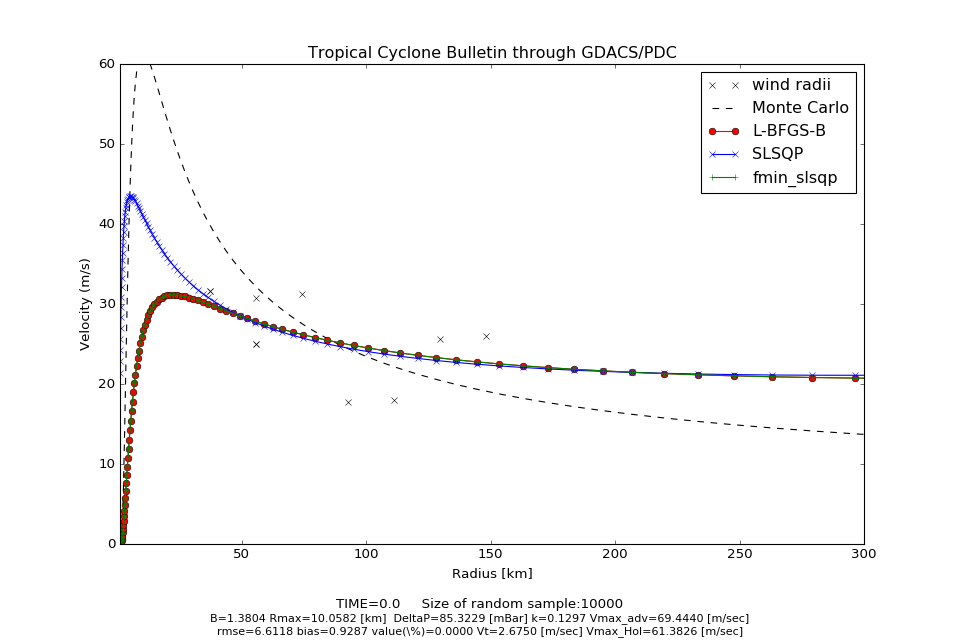

In [68]:
plt.figure(figsize=(12,8))
plt.plot(R/1000,V,'kx',label='wind radii')
plt.plot(r/1000,Vg,'k--',label='Monte Carlo')
plt.plot(r/1000,fitf2(p2,r),'ro-',label='L-BFGS-B')
plt.plot(r/1000,fitf2(p3,r),'bx-',label='SLSQP')
plt.plot(r/1000,fitf2(p4,r),'g+-',label='fmin_slsqp')


plt.axis([r.min()/1000,300.,0.,60.])
plt.xlabel('Radius [km]')
plt.ylabel('Velocity (m/s)')
plt.title(stitle)
plt.legend()
plt.figtext(.5,.05,'TIME='+np.str(time)+'     Size of random sample:'+np.str(nb),horizontalalignment='center')
plt.figtext(.5,.03,'B='+'%.4f' % b+' Rmax='+'%.4f' % (Rmax/1000)+' [km]  DeltaP='+'%.4f' % (dp/100)+' [mBar] k='+'%.4f' % k+' Vmax_adv='+'%.4f' % vmax0+' [m/sec]',horizontalalignment='center',size='small')
plt.figtext(.5,.01,'rmse='+'%.4f' % rmse+' bias='+'%.4f' % bias+' value(\%)='+'%.4f' %(value/totvalue*100)+' Vt='+'%.4f' % vtr+' [m/sec] Vmax_Hol='+'%.4f' % vmax1+' [m/sec]',horizontalalignment='center',size='small')
plt.subplots_adjust(bottom=.15)
plt.show()

## Compare with vpl production data

In [69]:
import csv
from bunch import bunchify
def readtxt(filename):

    with open(filename, 'r') as infile:
      cs = csv.reader(infile)
      header=cs.next()
      var=header[0].split('\t\t')
      if np.size(var)==1: var=header[0].split('\t')
      var= [v.strip() for v in var]
      data= {k:[] for k in var}
      for line in cs:
           lt=line[0].split('\t')
           for i in range(np.size(var)):
             data[var[i]].append(lt[i])

      for key in data:
        try:
          data[key]=[num(i) for i in data[key]]
        except: pass


      for key in data:
        data[key]=np.array(data[key])

      return bunchify(data)


def num(s):
     try:
        return int(s)
     except ValueError:
        return float(s)



In [70]:
outd=readtxt(latest_subdir+'{}'.format(bul)+'/outData.txt')
outd

Bunch(=array(['', '', '', '', '', '', '', ''], 
      dtype='|S1'), b=array([ 1.42304,  1.39916,  1.26976,  1.10319,  1.09415,  1.02681,
        1.02681,  1.02681]), bias=array([ 0.819022 , -0.389156 , -0.0131828,  0.297599 , -0.189381 ,
       -0.423881 ,        nan,        nan]), deltap=array([ 8278.47,  7807.99,  7223.03,  6742.23,  6700.47,  6935.46,
        6525.16,  7270.31]), k=array([ 0.144919,  0.144605,  0.134191,  0.132851,  0.134452,  0.141975,
        0.141975,  0.141975]), rmax=array([ 10407.1,  10030.6,  10549.7,  10137.5,  10284.7,  10248. ,
        10248. ,  10248. ]), rmse=array([ 6.6768 ,  5.65477,  4.31663,  2.69638,  2.87317,  2.24222,
            nan,      nan]), time=array([   0.,    9.,   21.,   33.,   45.,   69.,   93.,  117.]), vmax=array([ 69.444,  66.872,  61.728,  56.584,  56.584,  56.584,  46.296,
        48.868]), vmax0=array([ 61.3885,  59.1163,  54.1657,  48.7787,  48.4278,  47.7294,
        38.3799,  41.172 ]), vtr=array([ 2.675  ,  2.5746 ,  2.80754, 

In [71]:
def vel(r,b,rhoa,rmax,maxR,kh,dp):
    x=0.5+(r-rmax)/(maxR-rmax)*kh  
    return (b/rhoa*(rmax/r)**b*dp*np.exp(-(rmax/r)**b))**x

In [72]:
outd.rmax[0]

10407.1

In [73]:
vpl=vel(r,outd.b[0],rhoa,outd.rmax[0],maxR,outd.k[0],outd.deltap[0])

<IPython.core.display.Javascript object>


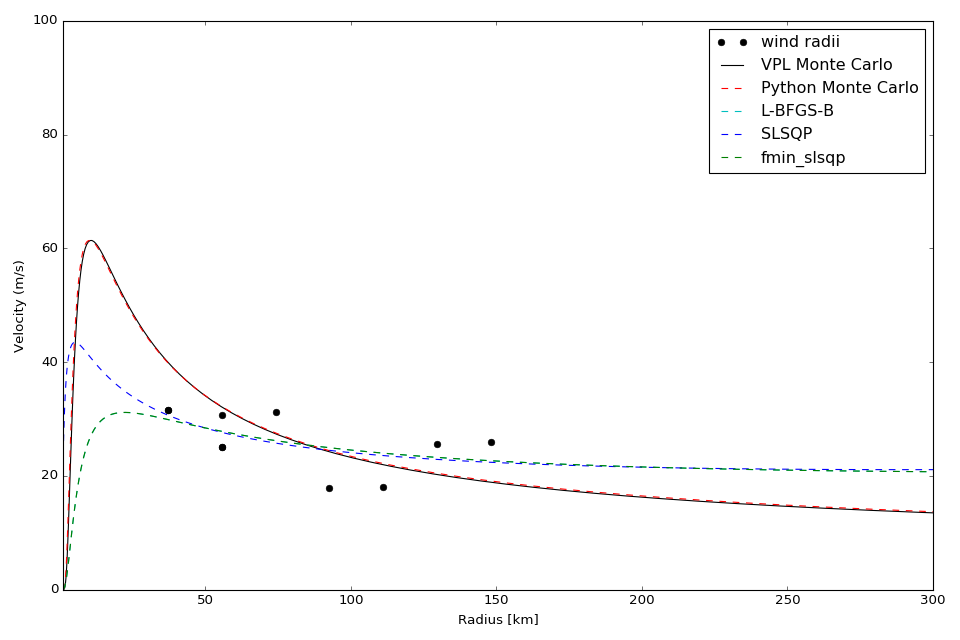

In [88]:
plt.figure(figsize=(12,8))
plt.plot(R/1000,V,'ko',label='wind radii')
plt.plot(r/1000,vpl,'k-',label='VPL Monte Carlo')
plt.plot(r/1000,Vg,'r--',label='Python Monte Carlo')
plt.plot(r/1000,fitf2(p2,r),'c--',label='L-BFGS-B')
plt.plot(r/1000,fitf2(p3,r),'b--',label='SLSQP')
plt.plot(r/1000,fitf2(p4,r),'g--',label='fmin_slsqp')

plt.axis([r.min()/1000,300.,0.,100.])
plt.xlabel('Radius [km]')
plt.ylabel('Velocity (m/s)')
#plt.title(stitle)
plt.legend()
#plt.figtext(.5,.05,'TIME='+np.str(time)+'     Size of random sample:'+np.str(nb),horizontalalignment='center')
#plt.figtext(.5,.03,'B='+'%.4f' % b+' Rmax='+'%.4f' % (Rmax/1000)+' [km]  DeltaP='+'%.4f' % (dp/100)+' [mBar] k='+'%.4f' % k+' Vmax_adv='+'%.4f' % vmax0+' [m/sec]',horizontalalignment='center',size='small')
#plt.figtext(.5,.01,'rmse='+'%.4f' % rmse+' bias='+'%.4f' % bias+' value(\%)='+'%.4f' %(value/totvalue*100)+' Vt='+'%.4f' % vtr+' [m/sec] Vmax_Hol='+'%.4f' % vmax1+' [m/sec]',horizontalalignment='center',size='small')
#plt.subplots_adjust(bottom=.15)
plt.tight_layout()
plt.show()

In [75]:
import pandas

In [76]:
pd=pandas.DataFrame(np.array([outd.vtr,VTR]).T,columns=['VPL','PYTHON'])
print 'VTR'
pd

VTR


,VPL,PYTHON
0,2.67500,2.675013
1,2.57460,2.576018
2,2.80754,2.800578
3,3.46831,3.470191
4,3.83802,3.840173
5,4.57602,4.551899
6,4.21245,4.300258
7,3.78654,3.643085


In [77]:
pd=pandas.DataFrame(np.array([outd.vtrx,VTRX]).T,columns=['VPL','PYTHON'])
print 'VTRX'
pd

VTRX


,VPL,PYTHON
0,-2.675000,-2.675013
1,-2.518990,-2.519614
2,-1.841560,-1.840174
3,-1.494500,-1.495426
4,-1.133040,-1.128437
5,0.052077,0.028939
6,-0.281792,-0.195743
7,-0.710623,-0.876264


In [78]:
pd=pandas.DataFrame(np.array([outd.vtry,VTRY]).T,columns=['VPL','PYTHON'])
print 'VTRY'
pd

VTRY


,VPL,PYTHON
0,0.000013,-2.018527e-08
1,0.532216,5.361089e-01
2,2.119190,2.111160e+00
3,3.129800,3.131442e+00
4,3.666960,3.670635e+00
5,4.575730,4.551807e+00
6,4.203020,4.295801e+00
7,3.719260,3.536132e+00


<IPython.core.display.Javascript object>


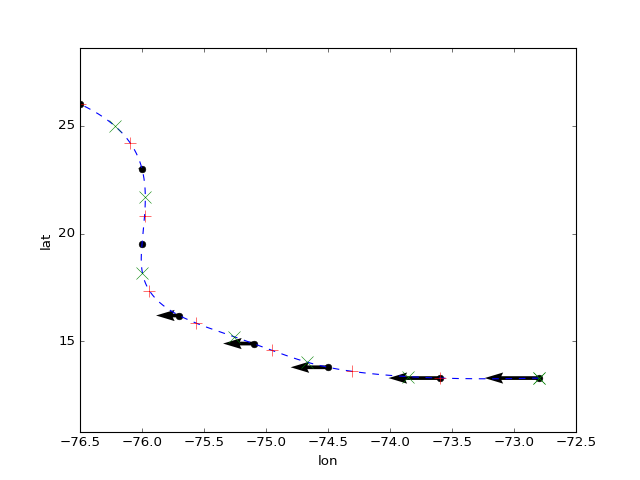

In [79]:
# plot the initial points and the interpolated tranjectory

plt.figure()
plt.plot(x,y,'ko',x1000,y1000,'--')
plt.plot(x1,y1,'x',x2,y2,'+',markersize=10)
plt.xlabel('lon')
plt.ylabel('lat')
plt.quiver(x,y,vtrx0,vtry )
#plt.quiver(x,y,vtrx_,vtry_, color='r' )

#plt.quiver(outd.xhc,outd.yhc,outd.vtrx,outd.vtry,color='r',pivot='mid')
(yr1,yr2) = plt.ylim()
plt.ylim(.9*yr1,1.1*yr2)
#plt.annotate()
#plt.savefig(outdirplot+'/track.png')
plt.show()